# Créer des formes de bases en SVG

## Importer SVGWRITE et définir les dimenssions du document
> https://svgwrite.readthedocs.io/en/latest

In [99]:
import svgwrite
from svgwrite import Drawing, cm, mm
from IPython.display import SVG, display

# A4
A4_width = 297
A4_height = 210

# A5
A5_width = A4_height
A5_height = A4_width/2

# Centre
cx = A5_width / 2
cy = A5_height / 2

# Settings

dwg = Drawing(
    'test.svg',
    size=(f'{A4_width}mm', f'{A4_height}mm'),
    viewBox=f'0 0 {A4_width} {A4_height}',
    profile='full'
)

## Définir la zone A5 qui contiendra la forme

In [100]:
# Créer la zone
x = (A4_width - A5_width) / 2
y = (A4_height - A5_height) / 2
A5_area = dwg.g(transform=f"translate({x},{y})")

# Dessiner la zone
A5_area.add(dwg.rect(insert=(0, 0), size=(A5_width, A5_height), fill='none', stroke='red', stroke_dasharray="5,5"))
dwg.add(A5_area)

## Fonctions pour chaque formes

In [ ]:
def circle(dwg, group, cx, cy, r, fill='none', stroke='black'):
    group.add(dwg.circle(center=(cx,cy), r=r, fill=fill, stroke=stroke))

def ellipse(dwg, group, cx, cy, rx, ry, fill='none', stroke='black'):
    group.add(dwg.ellipse(center=(cx,cy), r=(rx,ry), fill=fill, stroke=stroke))

def rectangle(dwg, group, x, y, width, height, fill='none', stroke='black', rx=None, ry=None):
    group.add(dwg.rect(insert=(x, y), size=(width, height), fill=fill, stroke=stroke, rx=rx, ry=ry))
 
def line(dwg, group, x1, y1, x2, y2, stroke_width, stroke='black'):
    group.add(dwg.line(start=(x1,y1), end=(x2,y2), stroke=stroke, stroke_width=stroke_width))

def polyline(dwg, group, points, stroke_width, fill='none', stroke='black'):
    group.add(dwg.polyline(points=points, stroke=stroke, stroke_width=stroke_width, fill=fill))

def polygon(dwg, group, points, stroke_width, fill='none', stroke='black'):
    group.add(dwg.polygon(points=points, stroke=stroke, stroke_width=stroke_width, fill=fill))

def path(dwg, group, dots, stroke_width=1, fill='none', stroke='black'):
    group.add(dwg.path(d=dots, stroke=stroke, fill=fill, stroke_width=stroke_width))

## Ajout de la forme

In [102]:
# Point central
circle(dwg, A5_area, cx=cx, cy=cy, r=1)

## Visualiser et enregistrer le SVG

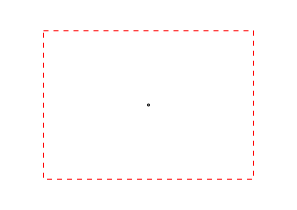

In [103]:
display(SVG(dwg.tostring()))

dwg.save()

# Autres formes

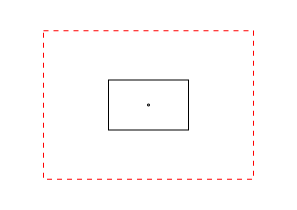

In [104]:
rectangle_w = 80
rectangle_h = 50

rectangle(dwg, A5_area, x=cx-rectangle_w/2, y=cy-rectangle_h/2, width=rectangle_w, height=rectangle_h)

display(SVG(dwg.tostring()))

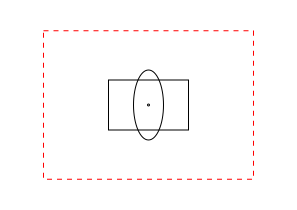

In [105]:
ellipse(dwg, A5_area, cx=cx, cy=cy, rx=15, ry=35)

display(SVG(dwg.tostring()))

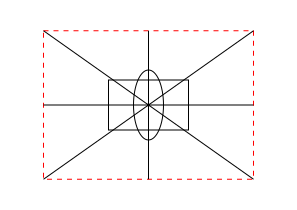

In [107]:
# Horizontal
line(dwg, A5_area, x1=A5_width/2, y1=0, x2=A5_width/2, y2=A5_height, stroke_width=1)
# Vertical
line(dwg, A5_area, x1=0, y1=A5_height/2, x2=A5_width, y2=A5_height/2, stroke_width=1)
# Diagonale 1
line(dwg, A5_area, x1=0, y1=0, x2=A5_width, y2=A5_height, stroke_width=1)
# Diagonale 2
line(dwg, A5_area, x1=A5_width, y1=0, x2=0, y2=A5_height, stroke_width=1)

display(SVG(dwg.tostring()))

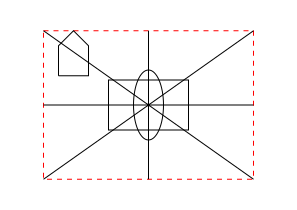

In [108]:
points_polyline = [(15, 45), (45, 45), (45, 15), (30, 0), (15, 15), (15, 45)]
polyline(dwg, A5_area, points_polyline, stroke_width=1)

display(SVG(dwg.tostring()))

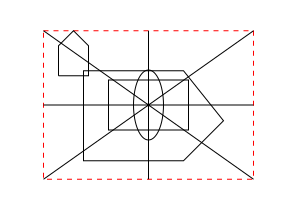

In [109]:
points_polygone = [(40, 40), (140, 40), (180, 90), (140, 130), (40, 130)]
polygon(dwg, A5_area, points_polygone, stroke_width=1)

display(SVG(dwg.tostring()))

In [124]:
dots = 'M47,24 C49,29, 55,29, 57,24'

path(dwg, A5_area, dots, stroke_width=1)

display(SVG(dwg.tostring()))

TypeError: path() missing 2 required positional arguments: 'cx' and 'cy'